# CLustering is the ML unsupervised methods,used to group the data based on similaries in the data - Hierarchial clustering 

# Hierarchial clustering

In [ ]:
import jupyterthemes
!jt -t onedork

In [ ]:
# similar records will be clubbed together 
# DO EDA process - not mandatory(few are mandatory)
# scale the data
# calculate the distance - Euclidean or manhatten
# cluster the records based on single/complete link ('least /farthest ' distance)
# divide in the clusters into 2 or 3 classes based on the requirement
# use dendogram to visualise the clustered data
#join the classes with main data

In [ ]:
import os
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_9d3ba0df94c74c0abac44d55ebf2a601 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_9d3ba0df94c74c0abac44d55ebf2a601 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_9d3ba0df94c74c0abac44d55ebf2a601 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jG7rSfw-gAgJCeEk0GrsfFMMZsDNDuMusb6h_KWOHGG4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_9d3ba0df94c74c0abac44d55ebf2a601)

body = client_9d3ba0df94c74c0abac44d55ebf2a601.get_object(Bucket='rainfallprediction-donotdelete-pr-ltz8foccv0x3dv',Key='weatherAUS.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.head()

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1

In [ ]:
data.shape

(2000, 8)

In [ ]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
data.describe()

ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500    35.909000     1.03800   
std    5.774946e+02     0.498272        0.500113    11.719402     0.59978   
min    1.000000e+08     0.000000        0.000000    18.000000     0.00000   
25%    1.000005e+08     0.000000        0.000000    27.000000     1.00000   
50%    1.000010e+08     0.000000        0.000000    33.000000     1.00000   
75%    1.000015e+08     1.000000        1.000000    42.000000     1.00000   
max    1.000020e+08     1.000000        1.000000    76.000000     3.00000   

              Income   Occupation  Settlement size  
count    2000.000000  2000.000000      2000.000000  
mean   120954.419000     0.810500         0.739000  
std     38108.824679     0.638587         0.812533  
min     35832.000000     0.000000         0.000000  
25%     97663.250000     0.000000         0.000000  
50%    115548.500000     1.000000         1.000000  
75%    138072.250000     1.000000         1.000000  
max    309364.000000     2.000000         2.000000

In [ ]:
cor = data.corr()
cor

ID       Sex  Marital status       Age  Education  \
ID               1.000000  0.328262        0.074403 -0.085246   0.012543   
Sex              0.328262  1.000000        0.566511 -0.182885   0.244838   
Marital status   0.074403  0.566511        1.000000 -0.213178   0.374017   
Age             -0.085246 -0.182885       -0.213178  1.000000   0.654605   
Education        0.012543  0.244838        0.374017  0.654605   1.000000   
Income          -0.303217 -0.195146       -0.073528  0.340610   0.233459   
Occupation      -0.291958 -0.202491       -0.029490  0.108388   0.064524   
Settlement size -0.378445 -0.300803       -0.097041  0.119751   0.034732   

                   Income  Occupation  Settlement size  
ID              -0.303217   -0.291958        -0.378445  
Sex             -0.195146   -0.202491        -0.300803  
Marital status  -0.073528   -0.029490        -0.097041  
Age              0.340610    0.108388         0.119751  
Education        0.233459    0.064524         0.034732  
Income           1.000000    0.680357         0.490881  
Occupation       0.680357    1.000000         0.571795  
Settlement size  0.490881    0.571795         1.000000

<AxesSubplot:>

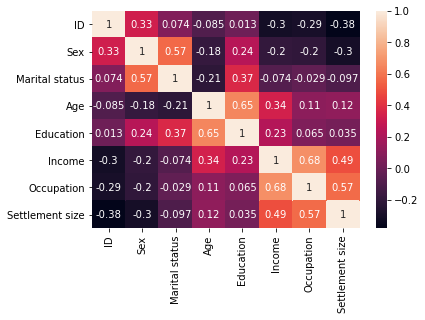

In [ ]:
sns.heatmap(cor,annot=True)

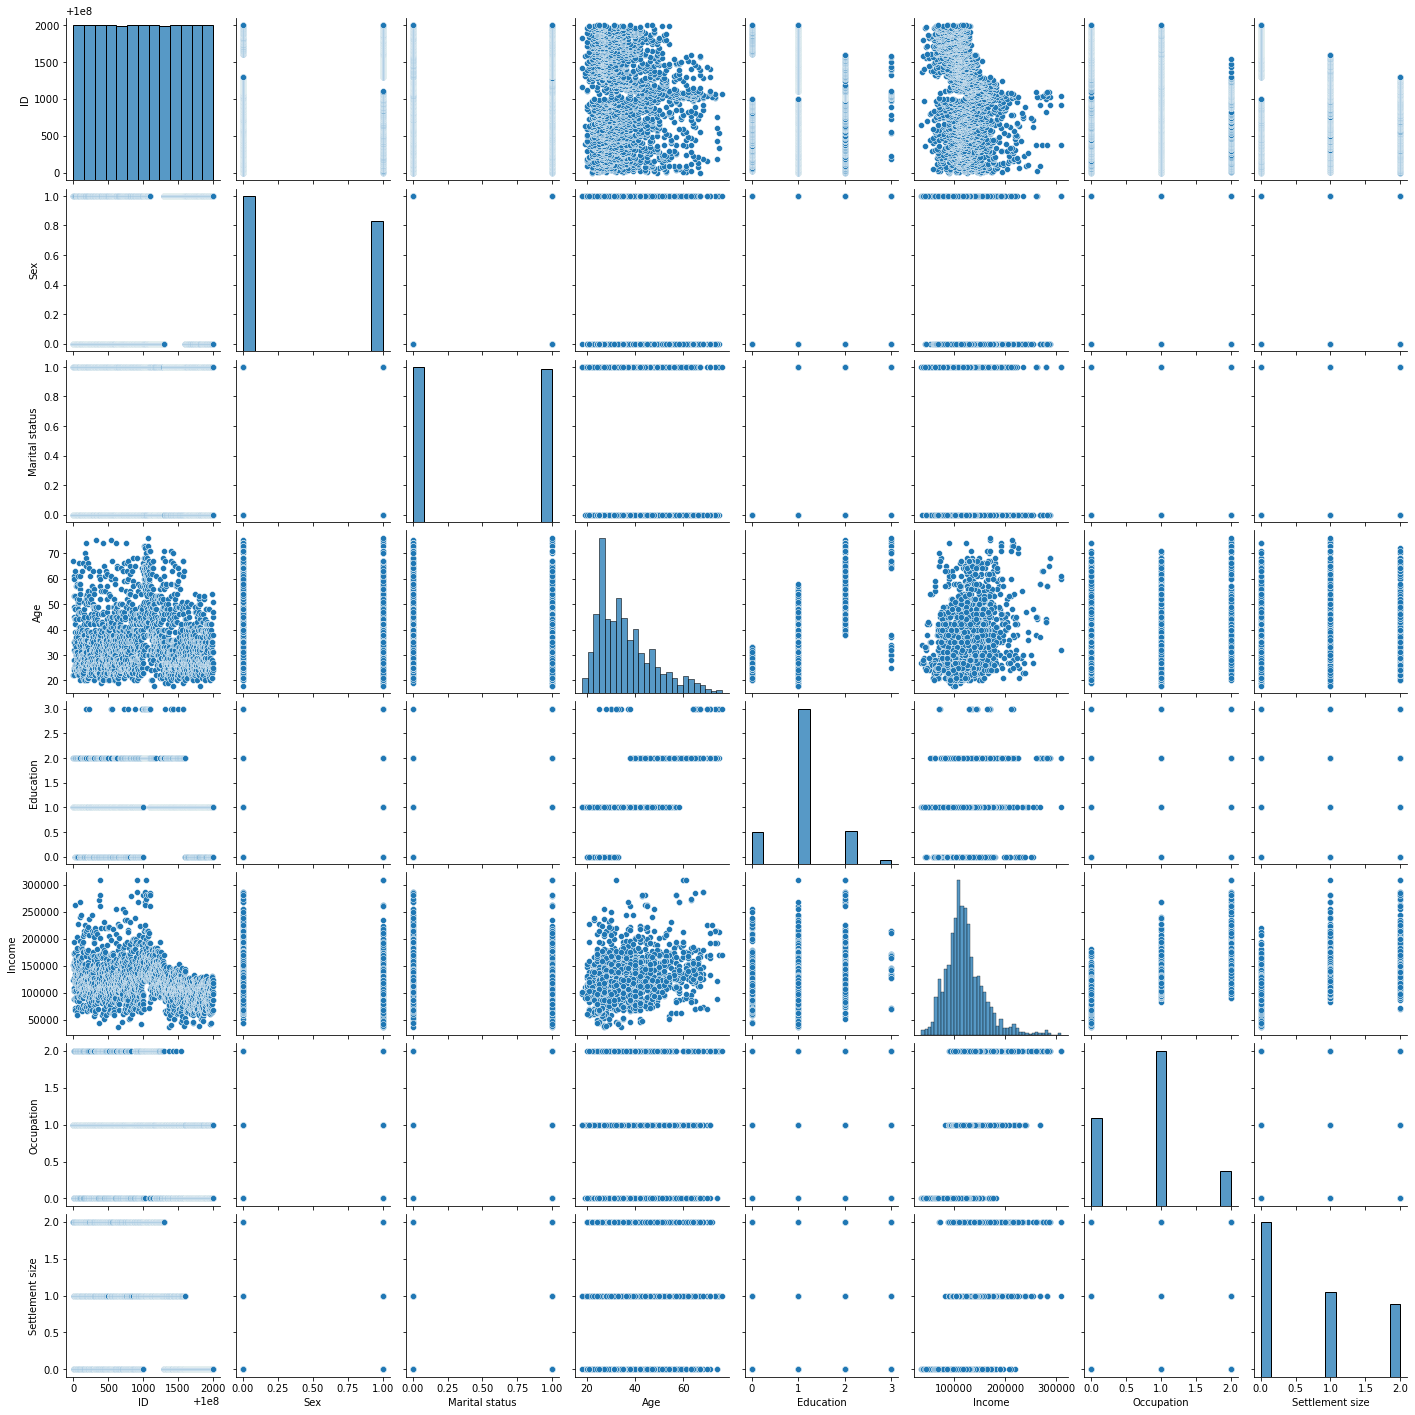

In [ ]:
sns.pairplot(data)

In [ ]:
data.drop(columns=['ID'],axis=1,inplace=True)

In [ ]:
data.head()

Sex  Marital status  Age  Education  Income  Occupation  Settlement size
0    0               0   67          2  124670           1                2
1    1               1   22          1  150773           1                2
2    0               0   49          1   89210           0                0
3    0               0   45          1  171565           1                1
4    0               0   53          1  149031           1                1

<AxesSubplot:>

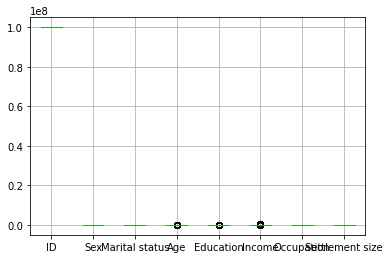

In [ ]:
data.boxplot()

In [ ]:
names = data.columns

In [ ]:
data.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
data = preprocessing.minmax_scale(data,feature_range=(0,1))  #scaling the data

In [ ]:
data

array([[0.        , 0.        , 0.84482759, ..., 0.32478101, 0.5       ,
        1.        ],
       [1.        , 1.        , 0.06896552, ..., 0.42021043, 0.5       ,
        1.        ],
       [0.        , 0.        , 0.53448276, ..., 0.19514353, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.22413793, ..., 0.18487051, 0.        ,
        0.        ],
       [1.        , 1.        , 0.10344828, ..., 0.22716172, 0.        ,
        0.        ],
       [0.        , 0.        , 0.12068966, ..., 0.11912317, 0.        ,
        0.        ]])

In [ ]:
data = pd.DataFrame(data,columns=names) #scaled data will convert to array,so converting to dataframe

In [ ]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

In [ ]:
# using dendogram to find optimal no of clusters
import scipy.cluster.hierarchy as sch
import matplotlib as plt

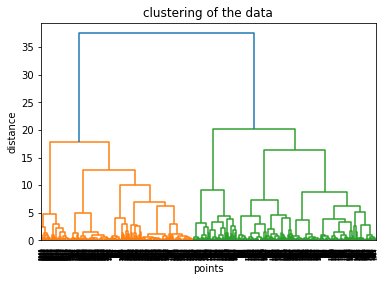

In [ ]:
dendogram = sch.dendrogram(sch.linkage(data,method="ward")) # calculates euclidean distance and classfy by default
plt.pyplot.title('clustering of the data')
plt.pyplot.ylabel('distance')
plt.pyplot.xlabel('points')
plt.pyplot.show()

In [ ]:
from sklearn import cluster
import sklearn as sk

In [ ]:
clus = cluster.AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='complete')
clus

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
clus.fit(data)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [ ]:
abc = clus.fit_predict(data)

In [ ]:
hclusdata = pd.DataFrame(data,pd.Series(abc))

# Creating a labled data with the help of clustering model 

In [ ]:
hclusdata['clus']= pd.Series(abc)

In [ ]:
hclusdata.head()

Sex  Marital status       Age  Education    Income  Occupation  \
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   

   Settlement size  clus  
1              1.0     0  
0              1.0     1  
1              1.0     0  
1              1.0     0  
1              1.0     0

In [ ]:
y = hclusdata['clus']
x = hclusdata.drop(columns=['clus'],axis=1)

# splitting the test and train data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1400, 7)
(600, 7)


# Applying supervised learning on the data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost

In [ ]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

In [ ]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

[10:45:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SmartbridgePC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

1.0
1.0
1.0


In [ ]:
metrics.confusion_matrix(pred,y_train)

array([[579,   0],
       [  0, 821]], dtype=int64)

# K-means clustering

In [ ]:
from scipy import spatial

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(hclusdata)
<ipython-input-56-ca99df456560>:4: ConvergenceWarning: Number of distinct c

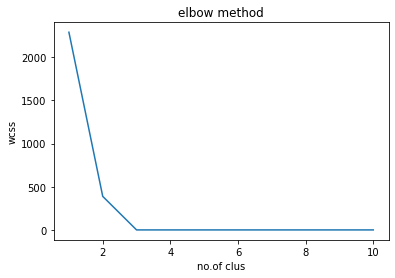

In [ ]:
plt.pyplot.plot(range(1,11),wcss)
plt.pyplot.title('elbow method')
plt.pyplot.xlabel('no.of clus')
plt.pyplot.ylabel('wcss')
plt.pyplot.show()

In [ ]:
km_model = cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [ ]:
ykmeans = km_model.fit_predict(data)

In [ ]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  
0              1.0  
1              1.0  
2              0.0  
3              0.5  
4              0.5

In [ ]:
data['kclus'] = pd.Series(ykmeans)

In [ ]:
data.head()

Sex  Marital status       Age  Education    Income  Occupation  \
0  0.0             0.0  0.844828   0.666667  0.324781         0.5   
1  1.0             1.0  0.068966   0.333333  0.420210         0.5   
2  0.0             0.0  0.534483   0.333333  0.195144         0.0   
3  0.0             0.0  0.465517   0.333333  0.496223         0.5   
4  0.0             0.0  0.603448   0.333333  0.413842         0.5   

   Settlement size  kclus  
0              1.0      2  
1              1.0      1  
2              0.0      0  
3              0.5      2  
4              0.5      2

In [ ]:
y = data['kclus']
x = data.drop(columns=['kclus'],axis=1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
rand_model = RandomForestClassifier()
tree_model =  tree.DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

In [ ]:
rand_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)

C:\Users\SmartbridgePC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
pred = rand_model.predict(x_test)
pred1 = tree_model.predict(x_test)
pred2 = xgb_model.predict(x_test)

In [ ]:
print(metrics.accuracy_score(pred,y_test))
print(metrics.accuracy_score(pred1,y_test))
print(metrics.accuracy_score(pred2,y_test))

0.995
0.9983333333333333
0.9883333333333333


In [ ]:
import ibm_watson_machine_learning

In [ ]:
from ibm_watson_machine_learning import APIClient

In [ ]:
wml_credntials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ZwTq99YvAP3KVVNcwyRggCwq0LapRgKdnJKPiboMqaR9"
}

In [ ]:
client = APIClient(wml_credntials)

In [ ]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client,space_name="customer_segmentation")
print("Space_UID = " + space_uid)

In [ ]:
client.set.default_space(space_uid)

In [ ]:
client.software_specifications.list()

In [ ]:
#setting the python version
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

In [ ]:
MODEL_NAME = 'predicting the customer segment'
DEPLOYMENT_NAME = 'customer_segmentation'
Traffic_MODEL = model

In [ ]:
import sklearn
sklearn.__version__

In [ ]:
# Setup model meta
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}


In [ ]:
# saving the model into model details
model_details = client.repository.store_model(model=Traffic_MODEL, meta_props=model_props,training_data=x_train, training_target=y_train)

In [ ]:
model_uid = client.repository.get_model_uid(model_details)
model_uid